In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def funtion(t,y,params):
  a= params[0]
  dydt= -a*y
  return dydt

In [ ]:
t0= 0.0
y0= 100
a= 1 
params= (a,)

t0= 0
tfin= 1
Nt= 100
h= 1/Nt
t= np.linspace(t0, tfin, Nt)


k1= funtion(t0,y0, params)
k2 = funtion(t0+h/2, y0+h/2*k1, params)
k3=  funtion(t0+h/2, y0+h/2*k2, params)
k4= funtion(t0+h/2,y0+h/2*k3, params)
kmean = 1/6*(k1+2*k2+2*k3+k4)

y1= y0 +kmean*h

In [ ]:
t1= t0+h
k1= funtion(t1,y1, params)
k2 = funtion(t1+h/2, y1+h/2*k1, params)
k3=  funtion(t1+h/2, y1+h/2*k2, params)
k4= funtion(t1+h/2,y1+h/2*k3, params)
kmean = 1/6*(k1+2*k2+2*k3+k4)

y2= y1 + kmean*h

In [ ]:
Y= np.zeros(Nt+1)
Y[0]= y0
T = np.linspace(0,1,Nt+1)
h= 1/Nt
t0= 0.0
y0= 100
a= 1 
params= (a,)

In [ ]:
T

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
#range?

In [ ]:
for i in range(0, Nt): 
  k1= funtion(T[i], Y[i], params)
  k2 = funtion(T[i]+h/2, Y[i]+h/2*k1, params)
  k3=  funtion(T[i]+h/2, Y[i]+h/2*k2, params)
  k4= funtion(T[i]+h/2,Y[i]+h/2*k3, params)
  kmean = 1/6*(k1+2*k2+2*k3+k4)
  Y[i+1] = Y[i]+kmean*h

In [ ]:
print(len(Y))

101


In [ ]:
print(len(T))

101


Text(0, 0.5, '$y$')

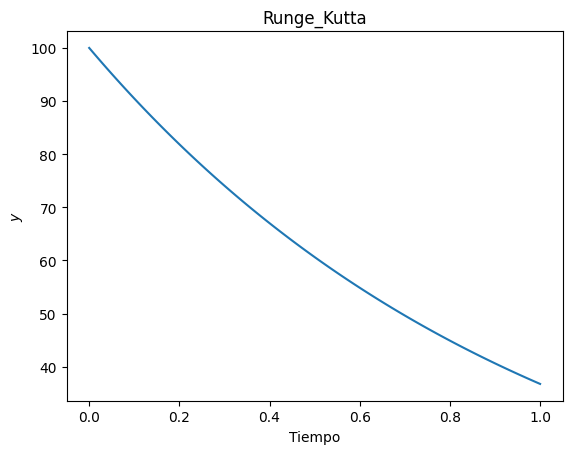

In [ ]:
plt.plot(T,Y)
plt.title("Runge_Kutta")
plt.xlabel("Tiempo")
plt.ylabel("$y$")


In [ ]:
def f(t,x,y,params): # Tener en cuenta que RungeKutta solo aplica a la ecuacion que se esta analizando
  a= params[0]
  dxdt= a*(y-x)
  return dxdt

def g(t,x,y,z,params):
  b= params[1]
  dydt= x(b-z)-y
  return dydt 

def h(t,x,y,z,params):
  c= params[2]
  dzdt= x*y -c*z
  return dzdt 

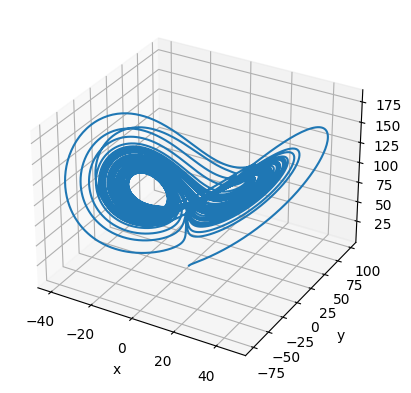

In [ ]:
sigma = 10
rho = 97
beta = 8./3
posI = [1, 1, 1]
N = 1000
ti = 0
tfin = 40


params=(sigma, rho, beta )
dt = h = 0.001
t = np.arange(0, 40, dt)
ti=t[0]
N=len(t)
x = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)
x[0], y[0],z[0] = np.array(posI)  



def fun(t, x,y,z, params):
  sigma = params[0]  
  rho = params[1]  
  beta = params[2]   

  dxdt = sigma*(y-x)
  dydt = x*(rho-z)-y
  dzdt = x*y-beta*z
  return np.array([dxdt, dydt, dzdt])



for i in range(0, N-1):
  k1 = fun(ti,       x[i],            y[i], z[i], params)[0]
  k2 = fun(ti + h/2, x[i] + h/2 * k1, y[i], z[i], params)[0]
  k3 = fun(ti + h/2, x[i] + h/2 * k2, y[i], z[i], params)[0]
  k4 = fun(ti + h  , x[i] + h   * k3, y[i], z[i], params)[0]
  kmean = (1/6) * (k1 + 2*k2 + 2*k3 + k4)   
  x[i+1] = x[i] + kmean*h
  
  q1 = fun(ti,       x[i],  y[i]           , z[i], params)[1]
  q2 = fun(ti + h/2, x[i],  y[i] + h/2 * q1, z[i], params)[1]
  q3 = fun(ti + h/2, x[i],  y[i] + h/2 * q2, z[i], params)[1]
  q4 = fun(ti + h  , x[i],  y[i] + h   * q3, z[i], params)[1]
  qmean = (1/6) * (q1 + 2*q2 + 2*q3 + q4)   
  y[i+1] = y[i] + qmean*h
  

  c1 = fun(ti,       x[i],  y[i], z[i], params)[2]
  c2 = fun(ti + h/2, x[i],  y[i], z[i] + h/2 * c1, params)[2]
  c3 = fun(ti + h/2, x[i],  y[i], z[i] + h/2 * c2, params)[2]
  c4 = fun(ti + h  , x[i],  y[i], z[i] + h   * c3, params)[2]
  cmean = (1/6) * (c1 + 2*c2 + 2*c3 + c4)   
  z[i+1] = z[i] + cmean*h

  ti=ti+dt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()